# Đề thi thử thực hành Học máy ứng dụng

- Các bạn có thời gian làm bài là 2.5h
- Chỉ được sử dụng tài liệu có sẵn và không được sử dụng những tài liệu tham khảo là AI(ChatGPT, Gemini,...)
- Cố gắng làm hết khả năng của mình nha :)

# Câu 1: 3 Điểm

Chúng ta đã biết công thức tính khoảng cách Euclidean như sau:

$$
d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

Trong đó:

$$
\mathbf{x} = [x_1, x_2, \dots, x_n] \quad \text{và} \quad \mathbf{y} = [y_1, y_2, \dots, y_n]
$$

là hai điểm trong không gian \(n\)-chiều.

Yêu cầu:
Viết hàm hàm tính khoảng cách Euclidean khi biết x = [1, 2, 3] và y = [4, 5, 6]


In [2]:
import math
def euclidean_distance(x, y):
    distance = 0.0
    for i in range(len(x)):
        distance +=(y[i] - x[i])**2
    return math.sqrt(distance)
x = [1,2,3]
y = [4,5,6]
distance = euclidean_distance(x,y)
print(distance)

5.196152422706632


# Câu 2: 5 Điểm

Cho tập dữ liệu hoa Iris

In [2]:
from sklearn.datasets import load_iris
from cvxopt import matrix, solvers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
# Load data
iris = load_iris()
X = iris.data[:200, :2]  # Chọn 200 mẫu đầu tiên và 2 đặc trưng đầu tiên
y = iris.target[:200]    # Chọn 200 nhãn đầu tiên
# Chuyển nhãn thành {-1, 1}
y = np.where(y == 0, -1, 1)

C:\Users\nguye\AppData\Local\Temp\ipykernel_8580\1857743233.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


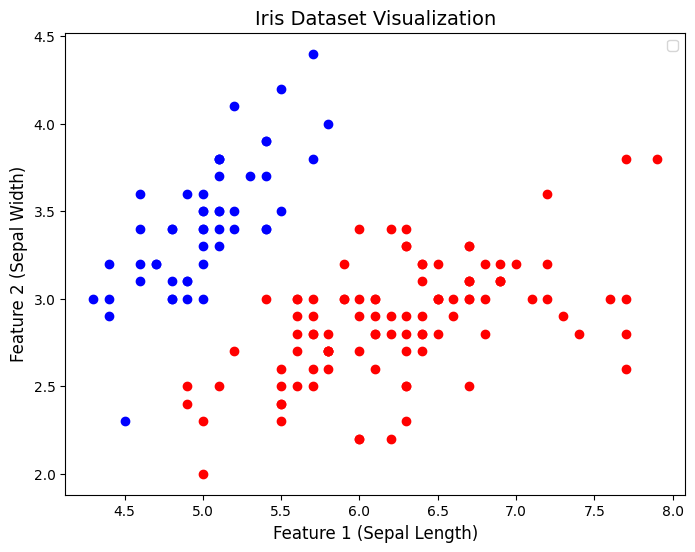

In [5]:
# Trực quan hóa dữ liệu
plt.figure(figsize=(8, 6))

# Vẽ điểm dữ liệu cho nhãn -1 và 1 (đã chuyển đổi)
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='blue')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red')

# Thêm nhãn và tiêu đề
plt.title('Iris Dataset Visualization', fontsize=14)
plt.xlabel('Feature 1 (Sepal Length)', fontsize=12)
plt.ylabel('Feature 2 (Sepal Width)', fontsize=12)

# Thêm legend để phân biệt các lớp
plt.legend()

# Hiển thị đồ thị
plt.show()

Kết quả tham khảo:

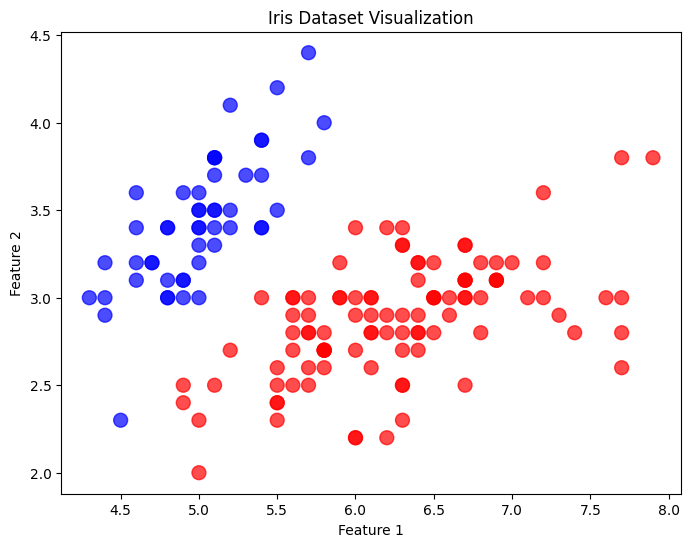

In [43]:
mean = X.mean(axis=0)
std_dev = X.std(axis=0)
X = (X - mean) / std_dev

     pcost       dcost       gap    pres   dres
 0: -2.8604e+01 -6.3735e+01  7e+02  3e+01  2e+00
 1: -5.2808e+01 -6.3087e+01  4e+02  1e+01  1e+00
 2: -1.0636e+02 -8.0020e+01  3e+02  8e+00  7e-01
 3: -2.1200e+02 -1.5055e+02  3e+02  8e+00  7e-01
 4: -1.2180e+02 -7.2427e+01  3e+02  5e+00  4e-01
 5: -6.1694e+01 -3.7691e+01  7e+01  1e+00  8e-02
 6: -3.1586e+01 -3.0968e+01  7e+00  9e-02  7e-03
 7: -2.9826e+01 -2.9846e+01  9e-02  8e-04  6e-05
 8: -2.9835e+01 -2.9835e+01  9e-04  8e-06  6e-07
 9: -2.9835e+01 -2.9835e+01  9e-06  8e-08  6e-09
10: -2.9835e+01 -2.9835e+01  9e-08  8e-10  6e-11
11: -2.9835e+01 -2.9835e+01  9e-10  8e-12  6e-13
Optimal solution found.

Lambda = [ 0.     0.     0.     0.     0.     0.    -0.     0.     0.     0.
  0.     0.     0.    -0.     0.     0.     0.     0.     0.    -0.
  0.     0.    -0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    -0.     0.     0.     0.     6.096 -0.     0.     0.
  0.    23.739 -0.     0.    -0.     0.    -0.     0.     

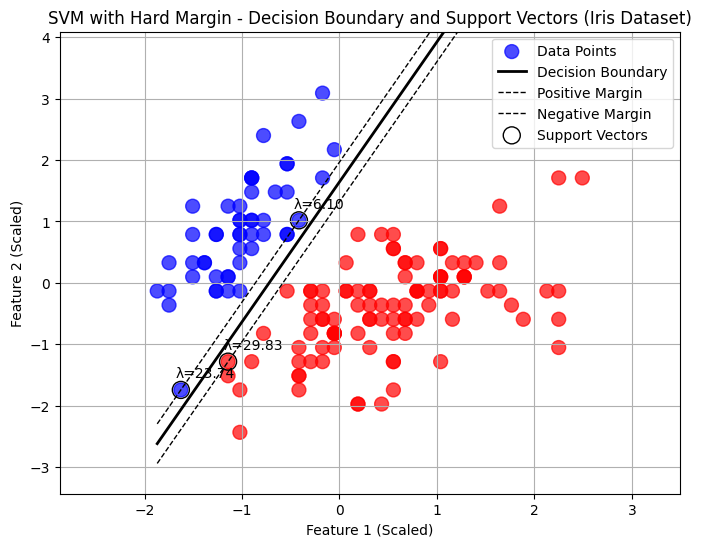


Margin = 0.2589


In [56]:
n_samples, n_features = X.shape
H = np.outer(y, y) * np.dot(X, X.T)
P = matrix(H)
q = matrix(-np.ones((n_samples, 1)))
G = matrix(-np.eye(n_samples))
h = matrix(np.zeros(n_samples))
A = matrix(y.astype(float), (1, n_samples))
b = matrix(0.0)

# Set solver parameters
solvers.options['abstol'] = 1e-10
solvers.options['reltol'] = 1e-10
solvers.options['feastol'] = 1e-10

# Solve the QP problem to find lambda (Lagrange multipliers)
solution = solvers.qp(P, q, G, h, A, b)
lamb = np.array(solution['x']).flatten()  # Convert solution to a 1D array

# ---- Compute w and b ----

# Weight vector w
w = np.sum(lamb[:, None] * y[:, None] * X, axis=0)

# Identify support vectors
support_vector_indices = np.where(lamb > 1e-5)[0]
support_vectors = X[support_vector_indices]
support_vector_labels = y[support_vector_indices]
support_vector_lambdas = lamb[support_vector_indices]

# Calculate bias b using the support vectors
b = np.mean(support_vector_labels - np.dot(support_vectors, w))

print('\nLambda =', np.round(lamb, 3))
print('w =', np.round(w, 3))
print('b =', np.round(b, 3))

# ---- Visualization ----

plt.figure(figsize=(8, 6))
colors = ['red' if label == 1 else 'blue' for label in y]
plt.scatter(X[:, 0], X[:, 1], s=100, c=colors, alpha=0.7, label='Data Points')

# Plot decision boundary
x1_dec = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_dec = -(w[0] * x1_dec + b) / w[1]
plt.plot(x1_dec, x2_dec, 'k-', lw=2.0, label='Decision Boundary')

# Plot positive and negative margins
w_norm = np.linalg.norm(w)
half_margin = 1 / w_norm

upper = -(w[0] * x1_dec + b - 1) / w[1]
lower = -(w[0] * x1_dec + b + 1) / w[1]
plt.plot(x1_dec, upper, 'k--', lw=1.0, label='Positive Margin')
plt.plot(x1_dec, lower, 'k--', lw=1.0, label='Negative Margin')

# Highlight support vectors
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=150, marker='o', facecolors='none', edgecolors='k', label='Support Vectors')

# Annotate lambda values for each support vector
for i, (x1, x2) in enumerate(support_vectors):
    plt.annotate(f'λ={support_vector_lambdas[i]:.2f}', (x1 - 0.05, x2 + 0.2))

plt.legend()
plt.title("SVM with Hard Margin - Decision Boundary and Support Vectors (Iris Dataset)")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.xlim(X[:, 0].min() - 1, X[:, 0].max() + 1)
plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
plt.grid(True)
plt.show()

print("\nMargin = {:.4f}".format(2 * half_margin))

Kết quả tham khảo:

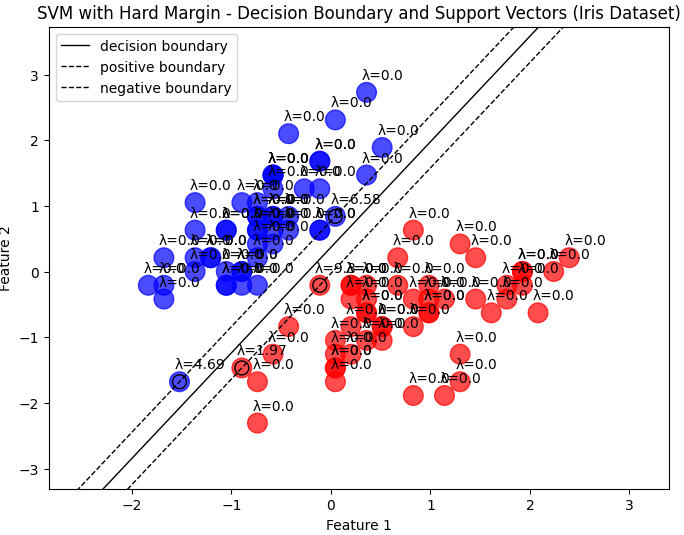

# Câu 3: 2 Điểm

## Công Thức Tính Gini Impurity trong cây quyết định

Gini Impurity là một thước đo độ hỗn loạn của một tập dữ liệu. Công thức tính Gini Impurity cho một tập dữ liệu \( S \) là:

$$ Gini(S) = 1 - \sum_{i=1}^{c} p_i^2 $$

Trong đó:
- \( c \) là số lượng lớp (classes).
- \( p_i \) là xác suất của lớp \( i \) trong tập dữ liệu \( S \).

Xác định lỗi sai của đoạn code bên dưới và sửa lại cho đúng

In [24]:
# Đọc đoạn code này
import numpy as np

def gini_impurity(y):
    unique_classes, counts = np.unique(y, return_counts=False)
    probabilities = counts / len(Y)
    return 1 - np.sum(probabilities)  

y = np.array([0, 1, 0, 1, 1, 0, 0, 1])
gini = gini_impurity(y)
print("Gini Impurity của tập dữ liệu là:", gini)

NameError: name 'Y' is not defined

### Đoạn code trên đúng hay sai? Nếu sai thì sửa lại như thế nào cho đúng ?

In [ ]:
# Trả lời câu hỏi trên ở đây
đoạn code trên sai:
unique_classes, counts = np.unique(y, return_counts=False)
probabilities = counts / len(Y)
return 1 - np.sum(probabilities) 
##### Code here
unique_classes, counts = np.unique(y, return_counts=True)
probabilities = counts / len(y)
return 1 - np.sum(probabilities**2) 